In [1]:
#attempt to improve the NN
#add the local and the global view construct coz transit false positive mismatch seems to be a major problem
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
#network and training parameters:
BATCH_SIZE = 128
VERBOSE = 1 #no idea what this is but lets see...
VAL_SPLIT = 0.12 #how much of sample is reserved for validation

In [16]:
Xtrain=np.loadtxt('training_data/Xtrain_big.csv',delimiter=',')
Ytrain=np.loadtxt('training_data/YtrainA_big.csv',delimiter=',')
Xtest=np.loadtxt('training_data/Xtest_big.csv',delimiter=',')
Ytest=np.loadtxt('training_data/YtestA_big.csv',delimiter=',')
Ytrain_ref=np.loadtxt('training_data/YtrainR_big.csv',delimiter=',')
Ytest_ref=np.loadtxt('training_data/YtestR_big.csv',delimiter=',')
print(Xtrain.shape,Ytrain.shape,Xtest.shape,Ytest.shape,Ytrain_ref.shape,Ytest_ref.shape)

(4500, 2000) (4500, 2) (297, 2000) (297, 2) (4500, 2) (297, 2)


In [22]:
#got the training set ... now write the neural net
#buid the model
#SGD stochastic gradient descent... 
DROPOUT=0.3
IP=4500
TEST=297
np.random.seed(11223)
checkloss=[]
checkloss_val=[]
checkacc_val=[]
checkacc=[]

arr=np.arange(0,IP,1)
np.random.shuffle(arr)
Xtrain=[Xtrain[i] for i in arr]
Ytrain=[Ytrain[i] for i in arr]
Ytrain_ref=[Ytrain_ref[i] for i in arr]

arr=np.arange(0,TEST,1)
np.random.shuffle(arr)
Xtest=[Xtest[i] for i in arr]
Ytest=[Ytest[i] for i in arr]
Ytest_ref=[Ytest_ref[i] for i in arr]


#Xtrain_new=np.array(Xtrain).reshape(5700,500,4)
#print(Xtrain_new.shape)
'''
conv_ip = keras.layers.Input(shape=(2000,),name='Input')
x=keras.layers.Reshape((2000, 1), input_shape=(2000,),name='reshape_1')(conv_ip)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Conv1D(16,kernel_size=5,strides=2,activation='relu',name='conv16_5')(x) 
x=keras.layers.Conv1D(16,kernel_size=5,strides=2,activation='relu',name='second_conv16_5')(x)
checkf=keras.layers.MaxPool1D(3,strides=3,data_format='channels_last',name='maxpool_1')(x)
x=keras.layers.Conv1D(32,kernel_size=5,strides=1,activation='relu',name='first_conv32_5')(checkf)
x=keras.layers.Conv1D(32,kernel_size=5,strides=1,activation='relu',name='second_conv32_5')(x)
x=keras.layers.MaxPool1D(3,strides=3,data_format='channels_last',name='maxpool_2')(x)
x=keras.layers.Conv1D(64,kernel_size=5,strides=1,activation='relu',name='conv64_5')(x)
x=keras.layers.Conv1D(64,kernel_size=5,strides=1,activation='relu',name='conv64_5_2')(x)
x=keras.layers.MaxPool1D(3,strides=3,data_format='channels_last',name='maxpool_3')(x)
x=keras.layers.Flatten(name='flat_1')(x)
x=keras.layers.Dense(16,name='dense_layer_1',activation='relu')(x)
conv_op=keras.layers.Dense(3,name='dense_layer_2',activation='softmax')(x)


convNN = keras.Model(inputs=conv_ip, outputs=conv_op,name='Convolutional_NN')

featuresNN = keras.Model(inputs=conv_ip, outputs=checkf)

convNN.summary()
convNN.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])'''

kernel_size = 5
kernel = np.ones(kernel_size) / kernel_size
Xtrain = [np.convolve(Xtrain[i], kernel, mode='same') for i in range(IP)]
Xtest = [np.convolve(Xtest[i], kernel, mode='same') for i in range(TEST)]

In [26]:

#add hidden layers
conv_ip = keras.layers.Input(shape=(2000,),name='Input')
x=keras.layers.Reshape((2000, 1), input_shape=(2000,),name='reshape_1')(conv_ip)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Conv1D(16,kernel_size=5,strides=1,activation='relu',name='conv16_5')(x) 
x=keras.layers.Conv1D(16,kernel_size=5,strides=1,activation='relu',name='second_conv16_5')(x)
x=keras.layers.MaxPool1D(5,strides=2,data_format='channels_last',name='maxpool_1')(x)
x=keras.layers.Conv1D(32,kernel_size=5,strides=1,activation='relu',name='first_conv32_5')(x)
x=keras.layers.Conv1D(32,kernel_size=5,strides=1,activation='relu',name='second_conv32_5')(x)
x=keras.layers.MaxPool1D(5,strides=2,data_format='channels_last',name='maxpool_2')(x)
x=keras.layers.Conv1D(64,kernel_size=5,strides=1,activation='relu',name='first_conv64_5')(x)
x=keras.layers.Conv1D(64,kernel_size=5,strides=1,activation='relu',name='second_conv64_5')(x)
x=keras.layers.MaxPool1D(5,strides=2,data_format='channels_last',name='maxpool_3')(x)
x=keras.layers.Conv1D(128,kernel_size=5,strides=1,activation='relu',name='first_conv128_5')(x)
x=keras.layers.Conv1D(128,kernel_size=5,strides=1,activation='relu',name='second_conv128_5')(x)
x=keras.layers.MaxPool1D(5,strides=2,data_format='channels_last',name='maxpool_4')(x)
x=keras.layers.Conv1D(256,kernel_size=5,strides=1,activation='relu',name='first_conv256_5')(x)
x=keras.layers.Conv1D(256,kernel_size=5,strides=1,activation='relu',name='second_conv256_5')(x)
x=keras.layers.MaxPool1D(5,strides=2,data_format='channels_last',name='maxpool_5')(x)
x=keras.layers.Flatten(name='flat_1')(x)
x=keras.layers.Dense(512,name='dense_layer_1',activation='relu')(x)
x=keras.layers.Dense(512,name='dense_layer_2',activation='relu')(x)
x=keras.layers.Dense(512,name='dense_layer_3',activation='relu')(x)
conv_op=keras.layers.Dense(2,name='dense_layer_4',activation='softmax')(x)


convNN = keras.Model(inputs=conv_ip, outputs=conv_op,name='Convolutional_NN')


convNN.summary()
convNN.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

Model: "Convolutional_NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 2000)]            0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 2000, 1)           0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 2000, 1)           4         
_________________________________________________________________
conv16_5 (Conv1D)            (None, 1996, 16)          96        
_________________________________________________________________
second_conv16_5 (Conv1D)     (None, 1992, 16)          1296      
_________________________________________________________________
maxpool_1 (MaxPooling1D)     (None, 994, 16)           0         
_________________________________________________________________
first_conv32_5 (Conv1D)      (None, 990, 32)      

In [27]:
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history=convNN.fit(np.array(Xtrain),np.array(Ytrain ), batch_size=64, epochs=40, verbose=VERBOSE, validation_split=0.2)

Epoch 1/40
57/57 [==============================] - 51s 876ms/step - loss: 0.6098 - accuracy: 0.6650 - val_loss: 0.6658 - val_accuracy: 0.6100
Epoch 2/40
57/57 [==============================] - 50s 873ms/step - loss: 0.5959 - accuracy: 0.6775 - val_loss: 0.6244 - val_accuracy: 0.6567
Epoch 3/40
57/57 [==============================] - 50s 871ms/step - loss: 0.5944 - accuracy: 0.6758 - val_loss: 0.6180 - val_accuracy: 0.6722
Epoch 4/40
57/57 [==============================] - 49s 867ms/step - loss: 0.5853 - accuracy: 0.6775 - val_loss: 0.6457 - val_accuracy: 0.6367
Epoch 5/40
57/57 [==============================] - 50s 875ms/step - loss: 0.5839 - accuracy: 0.6803 - val_loss: 0.6300 - val_accuracy: 0.6544
Epoch 6/40
57/57 [==============================] - 50s 877ms/step - loss: 0.5882 - accuracy: 0.6783 - val_loss: 0.6138 - val_accuracy: 0.6722
Epoch 7/40
57/57 [==============================] - 50s 877ms/step - loss: 0.6039 - accuracy: 0.6756 - val_loss: 0.6423 - val_accuracy: 0.6622

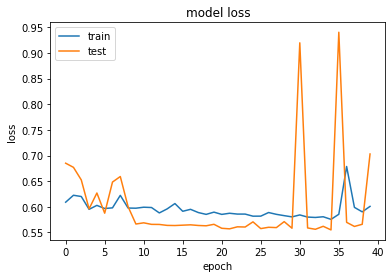

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

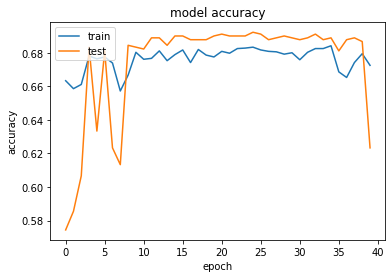

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

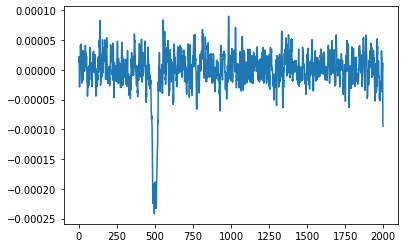

In [9]:
#testing the feature map
#Y=featuresNN.predict(np.array(Xtrain[:10]))
#sep=[[Y[i][j][1] for i in range(10)] for j in range(7)]
#plt.imshow(sep)
plt.plot(Xtrain[4])
#[plt.scatter(i,Y[0][i][2],color='green') for i in range(0,7)]
#[plt.scatter(i,Y[0][i][3],color='black') for i in range(0,7)]
plt.show()

In [14]:
test_loss, test_acc = convNN.evaluate(np.array(Xtest), np.array(Ytest))
print('Test accuracy:', test_acc)
Ypred_raw=convNN.predict(np.array(Xtest))
Ypred=np.argmax(Ypred_raw, axis=1)
Ytest_new=np.argmax(Ytest,axis=1)
cm = confusion_matrix(Ytest_new, Ypred)
print(cm)

8/8 [==============================] - 1s 118ms/step - loss: 0.6169 - accuracy: 0.6758
Test accuracy: 0.67578125
[[142   1]
 [ 82  31]]
